In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


In [53]:
Co60=pd.read_csv("./data/Co60_10minNaI.csv")
Na22=pd.read_csv("./data/Na22_10minNaI.csv")
Cs137=pd.read_csv("./data/Cs137_5minNaI.csv")

In [54]:
x=Co60.canal
y=Co60.cuentas

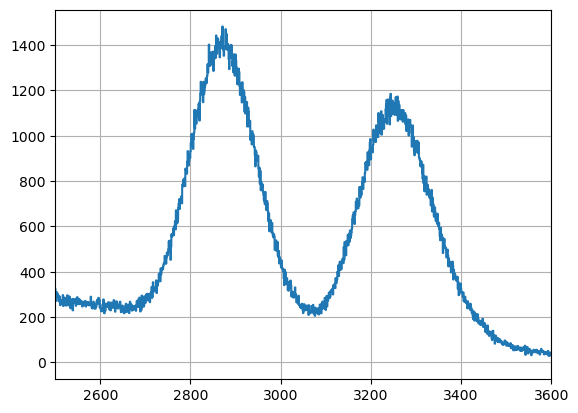

In [55]:
plt.plot(x,y,ds="steps-mid")
plt.xlim(2500,3600)
plt.grid()
plt.show()



Text(0.5, 1.0, 'Espectro $^{60}$Co')

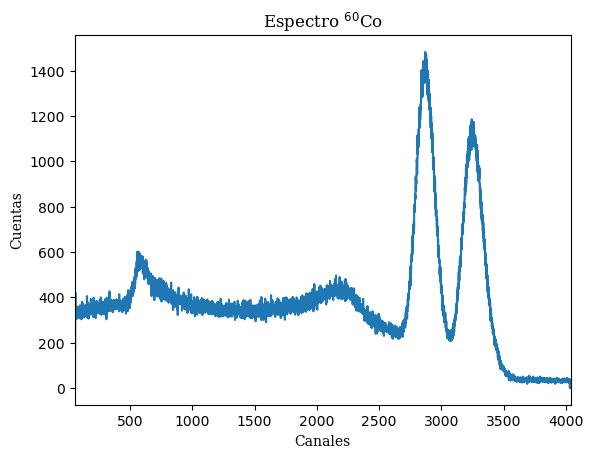

In [56]:
plt.plot(x,y,ds="steps-mid")
plt.xlim(55,4040)
plt.xlabel("Canales",family="serif")
plt.ylabel("Cuentas",family="serif")
plt.title(r"Espectro $^{60}$Co",family="serif")

In [57]:
def gaussiana(x,M,mu,sigma):
    return M*np.exp(-0.5*((mu-x)/(sigma))**2)
def fondo(x,b0,b1,mu):
    return b0+b1*(mu-x)

def gaussiana_experimental(x,M,mu,sigma,b0,b1):
    return fondo(x,b0,b1,mu)+gaussiana(x,M,mu,sigma)

def gaussiana_doble(x,M1,M2,mu1,mu2,sigma1,sigma2,b0,b1):
    return fondo(x,b0,b1,mu1)+gaussiana(x,M1,mu1,sigma1)+gaussiana(x,M2,mu2,sigma2)

In [58]:
fit2=curve_fit(gaussiana_doble,x[2500:3600],y[2500:3600],p0=[1200,1000,2900,3300,80,70,200,-0.22])

args2=fit2[0]
errorargs2=np.sqrt(np.diag(fit2[1]))
errorargs2
args2

array([1.21366294e+03, 1.00356509e+03, 2.87301525e+03, 3.25657886e+03,
       7.17636978e+01, 7.93975052e+01, 1.92494006e+02, 1.91351216e-01])

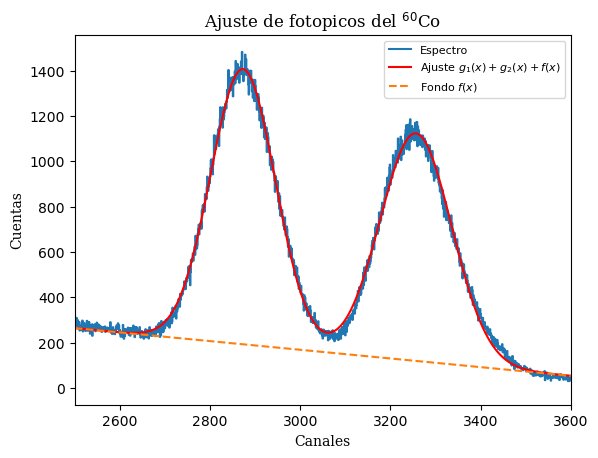

In [59]:
x2=np.linspace(2500,3600,10000)
y2=gaussiana_doble(x2,*args2)




plt.plot(x,y,ds="steps-mid",label="Espectro")
plt.plot(x2,y2,color="r",label=r"Ajuste $g_1(x)+g_2(x)+f(x)$")
plt.plot(x2,fondo(x2,1.92494006e+02, 1.91351216e-01,2.87301525e+03),linestyle="dashed",label=r"Fondo $f(x)$")
plt.xlim([2500,3600])
plt.xlabel("Canales",family="serif")
plt.ylabel("Cuentas",family="serif")
plt.title(r"Ajuste de fotopicos del $^{60}$Co",family="serif")
plt.legend(fontsize=8)

plt.show()

In [60]:
M1,M2,mu1,mu2,sigma1,sigma2,b0,b1=args2
print(f"mu1={mu1}")
print(f"mu2={mu2}")

mu1=2873.0152489044995
mu2=3256.578855585329


Text(0.5, 1.0, 'Espectro $^{22}$Na')

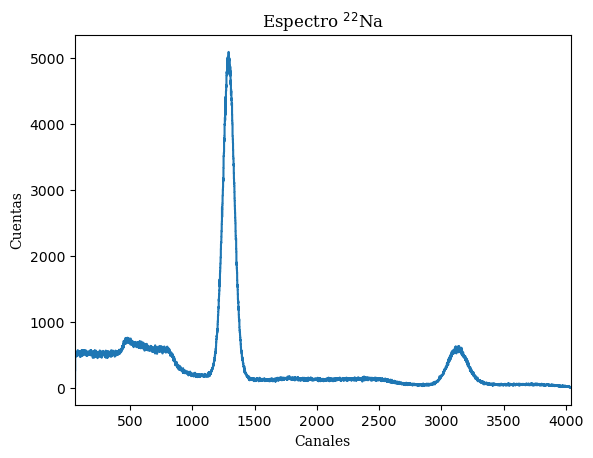

In [61]:
Na22x=Na22.canal
Na22y=Na22.cuentas
plt.plot(Na22x,Na22y,ds="steps-mid")
plt.xlim(55,4040)
plt.xlabel("Canales",family="serif")
plt.ylabel("Cuentas",family="serif")
plt.title(r"Espectro $^{22}$Na",family="serif")

Text(0.5, 1.0, 'Espectro $^{137}$Cs')

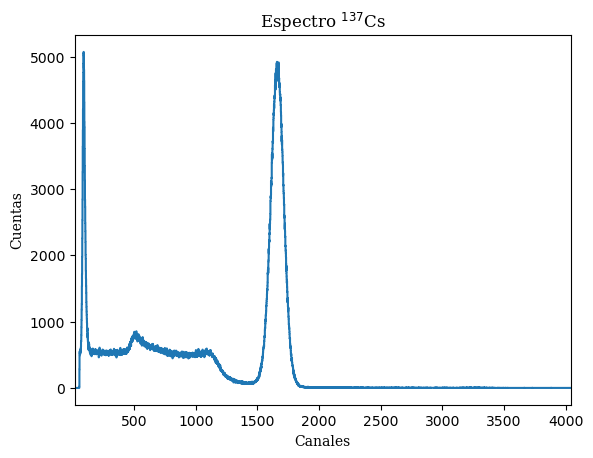

In [68]:
Cs137x=Cs137.canal
Cs137y=Cs137.cuentas
plt.plot(Cs137x,Cs137y,ds="steps-mid")
plt.xlim(20,4040)
plt.xlabel("Canales",family="serif")
plt.ylabel("Cuentas",family="serif")
plt.title(r"Espectro $^{137}$Cs",family="serif")